<a href="https://colab.research.google.com/github/b60c/Project_BDA_25/blob/main/BDA_Nahorna_Nedvyga_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xg

from datetime import datetime
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, TargetEncoder

## Exploring the dataset

In [3]:
dataset = pd.read_csv('employee_data.csv')

In [4]:
dataset.head()

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EmpID                       3000 non-null   int64 
 1   FirstName                   3000 non-null   object
 2   LastName                    3000 non-null   object
 3   StartDate                   3000 non-null   object
 4   ExitDate                    1533 non-null   object
 5   Title                       3000 non-null   object
 6   Supervisor                  3000 non-null   object
 7   ADEmail                     3000 non-null   object
 8   BusinessUnit                3000 non-null   object
 9   EmployeeStatus              3000 non-null   object
 10  EmployeeType                3000 non-null   object
 11  PayZone                     3000 non-null   object
 12  EmployeeClassificationType  3000 non-null   object
 13  TerminationType             3000 non-null   obje

In [6]:
print('Titles:')
for i, title in enumerate(dataset['Title'].sort_values().unique()):
    print(f'{i + 1}) {title}')

Titles:
1) Accountant I
2) Administrative Assistant
3) Area Sales Manager
4) BI Developer
5) BI Director
6) CIO
7) Data Analyst
8) Data Analyst 
9) Data Architect
10) Database Administrator
11) Director of Operations
12) Director of Sales
13) Enterprise Architect
14) IT Director
15) IT Manager - DB
16) IT Manager - Infra
17) IT Manager - Support
18) IT Support
19) Network Engineer
20) President & CEO
21) Principal Data Architect
22) Production Manager
23) Production Technician I
24) Production Technician II
25) Sales Manager
26) Senior BI Developer
27) Shared Services Manager
28) Software Engineer
29) Software Engineering Manager
30) Sr. Accountant
31) Sr. DBA
32) Sr. Network Engineer


In [7]:
print('Department types:')
for i, title in enumerate(dataset['DepartmentType'].sort_values().unique()):
    print(f'{i + 1}) {title}')

Department types:
1) Admin Offices
2) Executive Office
3) IT/IS
4) Production       
5) Sales
6) Software Engineering


In [8]:
print('Divisions:')
for i, title in enumerate(dataset['Division'].sort_values().unique()):
    print(f'{i + 1}) {title}')

Divisions:
1) Aerial
2) Billable Consultants
3) Catv
4) Corp Operations
5) Engineers
6) Executive
7) Field Operations
8) Fielders
9) Finance & Accounting
10) General - Con
11) General - Eng
12) General - Sga
13) Isp
14) People Services
15) Project Management - Con
16) Project Management - Eng
17) Safety
18) Sales & Marketing
19) Shop (Fleet)
20) Splicing
21) Technology / It
22) Underground
23) Wireless
24) Wireline Construction
25) Yard (Material Handling)


In [9]:
print('Employee type:')
for i, title in enumerate(dataset['EmployeeType'].sort_values().unique()):
    print(f'{i + 1}) {title}')

Employee type:
1) Contract
2) Full-Time
3) Part-Time


In [10]:
print('Employee status:')
for i, title in enumerate(dataset['EmployeeStatus'].sort_values().unique()):
    print(f'{i + 1}) {title}')

Employee status:
1) Active
2) Future Start
3) Leave of Absence
4) Terminated for Cause
5) Voluntarily Terminated


In [11]:
print('Termination type:')
for i, title in enumerate(dataset['TerminationType'].sort_values().unique()):
    print(f'{i + 1}) {title}')

Termination type:
1) Involuntary
2) Resignation
3) Retirement
4) Unk
5) Voluntary


In [12]:
print('Gender:')
for i, title in enumerate(dataset['GenderCode'].sort_values().unique()):
    print(f'{i + 1}) {title}')

Gender:
1) Female
2) Male


In [13]:
print('Race:')
for i, title in enumerate(dataset['RaceDesc'].sort_values().unique()):
    print(f'{i + 1}) {title}')

Race:
1) Asian
2) Black
3) Hispanic
4) Other
5) White


In [14]:
print('Marital status:')
for i, title in enumerate(dataset['MaritalDesc'].sort_values().unique()):
    print(f'{i + 1}) {title}')

Marital status:
1) Divorced
2) Married
3) Single
4) Widowed


In [15]:
print('Performance assessment:')
for i, title in enumerate(dataset['Performance Score'].sort_values().unique()):
    print(f'{i + 1}) {title}')

Performance assessment:
1) Exceeds
2) Fully Meets
3) Needs Improvement
4) PIP


In [ ]:
print('Employee rating:')
for i, title in enumerate(dataset['Current Employee Rating'].sort_values().unique()):
    print(f'{i + 1}) {title}')

## Preprocessing the dataset

We will add two more columns: 'Current Age' and 'Tenure'

In [16]:
# convert DOB, StartDate, ExitDate to datetime type
dataset['DOB'] = pd.to_datetime(dataset['DOB'], dayfirst=True)
dataset['StartDate'] = pd.to_datetime(dataset['StartDate'], dayfirst=True)
dataset['ExitDate'] = pd.to_datetime(dataset['ExitDate'], dayfirst=True)

<ipython-input-16-a101c68c0651>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['StartDate'] = pd.to_datetime(dataset['StartDate'], dayfirst=True)
<ipython-input-16-a101c68c0651>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['ExitDate'] = pd.to_datetime(dataset['ExitDate'], dayfirst=True)


In [17]:
date_now = datetime.now()
dataset['Current Age'] = ((date_now - dataset['DOB']) / pd.Timedelta(days=365)).astype('int')

In [18]:
print('Minimum age: ', dataset['Current Age'].min())
print('Maximum age: ', dataset['Current Age'].max())

Minimum age:  23
Maximum age:  83


In [19]:
dataset['Tenure'] = ((dataset['ExitDate'] - dataset['StartDate']) / pd.Timedelta(days=1)).astype('Int64')
dataset['Tenure'] = dataset['Tenure'].replace(0, np.nan)

In [20]:
print('Minimum days working: ', dataset['Tenure'].min())
print('Maximum days working: ', dataset['Tenure'].max())

Minimum days working:  1
Maximum days working:  1807


Let's see how the dataframe looks now (tenure must be NaN where exit date is absent).

In [21]:
dataset.head()

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Current Age,Tenure
0,3427,Uriah,Bridges,2019-09-20,NaT,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4,55,<NA>
1,3428,Paula,Small,2023-02-11,NaT,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3,59,<NA>
2,3429,Edward,Buck,2018-12-10,NaT,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4,33,<NA>
3,3430,Michael,Riordan,2021-06-21,NaT,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,ND,Clerk,Male,58782,Other,Single,Fully Meets,2,27,<NA>
4,3431,Jasmine,Onque,2019-06-29,NaT,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,FL,Laborer,Female,33174,Other,Married,Fully Meets,3,55,<NA>


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   EmpID                       3000 non-null   int64         
 1   FirstName                   3000 non-null   object        
 2   LastName                    3000 non-null   object        
 3   StartDate                   3000 non-null   datetime64[ns]
 4   ExitDate                    1533 non-null   datetime64[ns]
 5   Title                       3000 non-null   object        
 6   Supervisor                  3000 non-null   object        
 7   ADEmail                     3000 non-null   object        
 8   BusinessUnit                3000 non-null   object        
 9   EmployeeStatus              3000 non-null   object        
 10  EmployeeType                3000 non-null   object        
 11  PayZone                     3000 non-null   object      

Let's remove the duplicates.

In [23]:
'Duplicated rows: ' + str(dataset.drop(columns=['EmpID']).duplicated().sum())

'Duplicated rows: 0'

No duplicates.However maybe there are repeated people.

In [24]:
dataset[dataset[['FirstName', 'LastName']].duplicated()]

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Current Age,Tenure
1742,2169,Larissa,Warner,2020-07-04,2022-05-11,Production Technician II,Sarah Harrison,larissa.warner@bilearner.com,MSC,Active,...,MA,Flagger,Female,81396,Black,Widowed,Exceeds,3,29,676
2204,2631,Darien,Young,2021-03-03,NaT,Area Sales Manager,Maria Hale,darien.young@bilearner.com,MSC,Active,...,ID,Foreman,Female,50389,Black,Widowed,Fully Meets,2,27,<NA>


Found two repeated names. Let's see whether they belong to different people.

In [25]:
dataset[(dataset['FirstName'] == 'Larissa') & (dataset['LastName'] == 'Warner')]

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Current Age,Tenure
865,1292,Larissa,Warner,2018-10-27,NaT,Production Technician I,Amy Hess,larissa.warner@bilearner.com,BPC,Active,...,MA,Engineer,Female,28931,White,Divorced,Fully Meets,3,81,<NA>
1742,2169,Larissa,Warner,2020-07-04,2022-05-11,Production Technician II,Sarah Harrison,larissa.warner@bilearner.com,MSC,Active,...,MA,Flagger,Female,81396,Black,Widowed,Exceeds,3,29,676


Either these two Larissas are different people who happen to share names and emails, or this is one person who left the company, became a widow, changed her race from white to black, and was hired back.

In [26]:
dataset[(dataset['FirstName'] == 'Darien') & (dataset['LastName'] == 'Young')]

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Current Age,Tenure
1974,2401,Darien,Young,2022-11-09,2023-01-10,Production Manager,Christopher Reid,darien.young@bilearner.com,NEL,Terminated for Cause,...,MA,Technician,Female,96954,Asian,Divorced,Fully Meets,5,79,62
2204,2631,Darien,Young,2021-03-03,NaT,Area Sales Manager,Maria Hale,darien.young@bilearner.com,MSC,Active,...,ID,Foreman,Female,50389,Black,Widowed,Fully Meets,2,27,<NA>


Same issue as with Larissa. As long as names, emails, etc. are not important for our task, we will agree that those are different people and keep these rows in the dataset.

## Analyzing the dataset


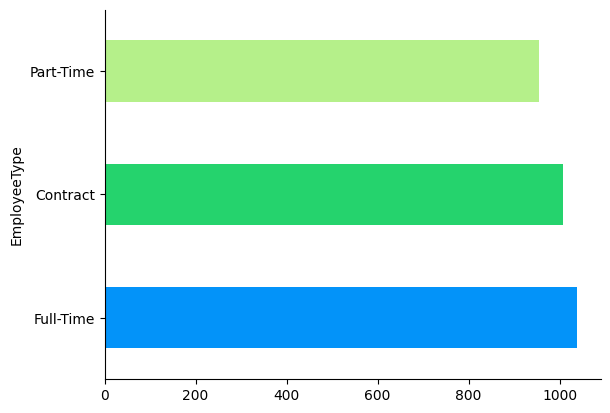

In [27]:
dataset.groupby('EmployeeType').size().sort_values(ascending=False).plot(kind='barh', color=sns.palettes.mpl_palette('terrain'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The company has an approximately equal number of full-time, part-time and contract employees.

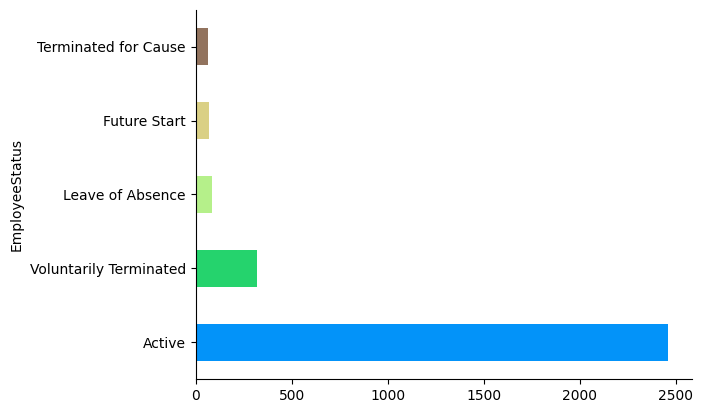

In [28]:
dataset.groupby('EmployeeStatus').size().sort_values(ascending=False).plot(kind='barh', color=sns.palettes.mpl_palette('terrain'))
plt.gca().spines[['top', 'right',]].set_visible(False)

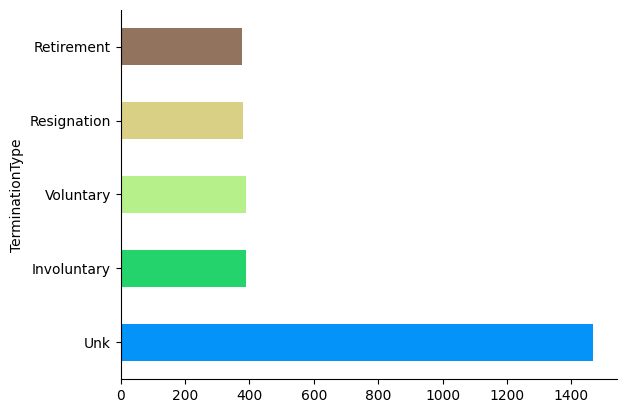

In [29]:
dataset.groupby('TerminationType').size().sort_values(ascending=False).plot(kind='barh', color=sns.palettes.mpl_palette('terrain'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Most of the non-active employees were voluntarily terminated, however the number remains comparatively small. Most of the reasons for termination are not mentioned.

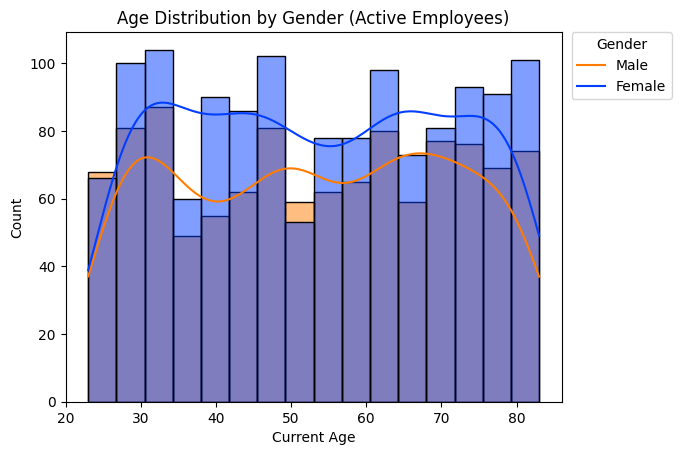

In [30]:
sns.histplot(data=dataset[dataset['EmployeeStatus'] == 'Active'], x='Current Age', bins=16, hue='GenderCode', kde=True, palette='bright')
plt.title('Age Distribution by Gender (Active Employees)')
plt.legend(title='Gender', loc=2, labels=['Male', 'Female'], bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

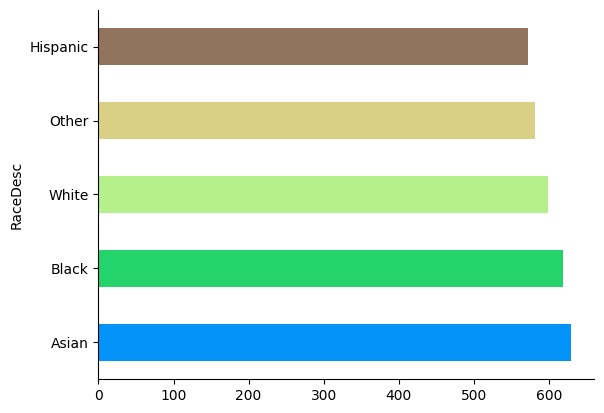

In [31]:
dataset.groupby('RaceDesc').size().sort_values(ascending=False).plot(kind='barh', color=sns.palettes.mpl_palette('terrain'))
plt.gca().spines[['top', 'right',]].set_visible(False)

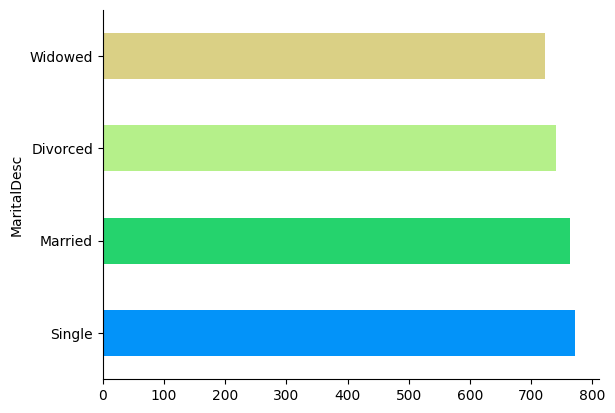

In [32]:
dataset.groupby('MaritalDesc').size().sort_values(ascending=False).plot(kind='barh', color=sns.palettes.mpl_palette('terrain'))
plt.gca().spines[['top', 'right',]].set_visible(False)

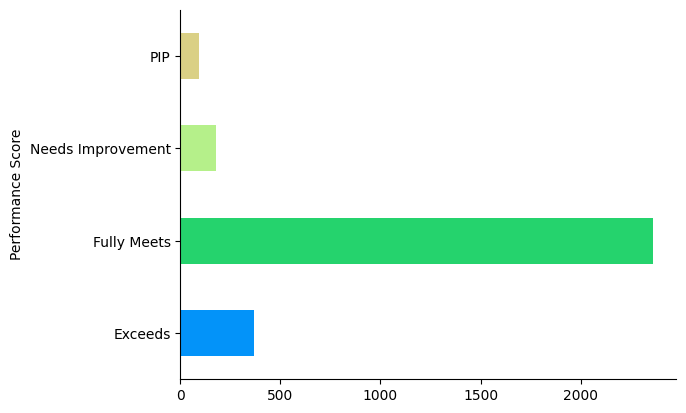

In [33]:
dataset.groupby('Performance Score').size().plot(kind='barh', color=sns.palettes.mpl_palette('terrain'))
plt.gca().spines[['top', 'right',]].set_visible(False)

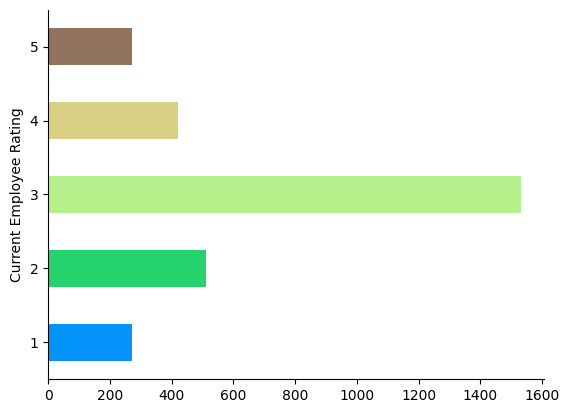

In [34]:
dataset.groupby('Current Employee Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('terrain'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Most employees demonstrate satisfactory 3/5 performance. That's why we are here!

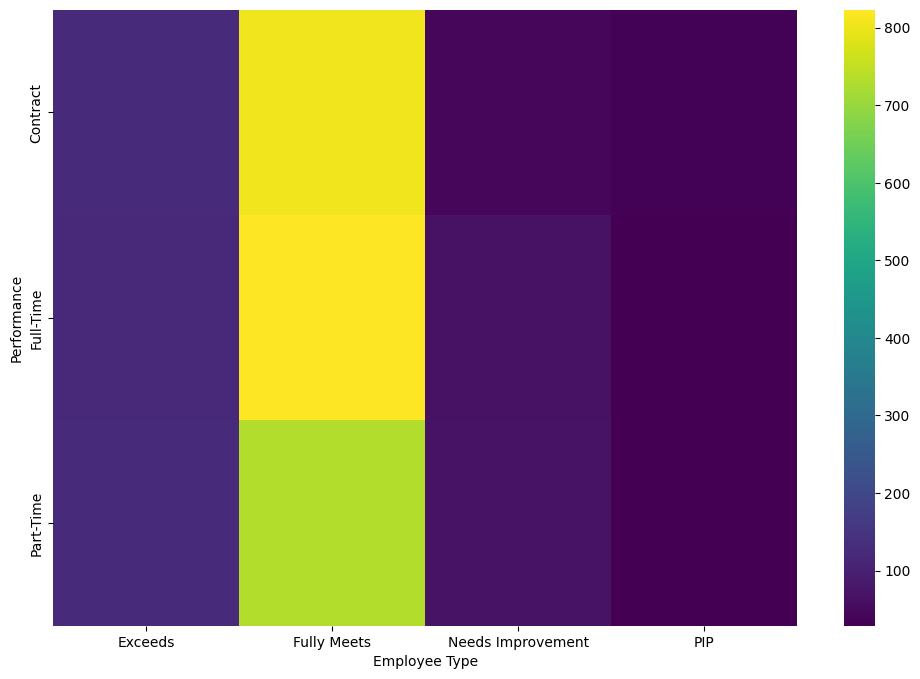

In [35]:
plt.subplots(figsize=(12, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['EmployeeType'].value_counts()
    for x_label, grp in dataset.groupby('Performance Score')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Employee Type')
_ = plt.ylabel('Performance')

There are less part-time workers than any other kind of employees, so the difference shown in the above plot is to be expected.

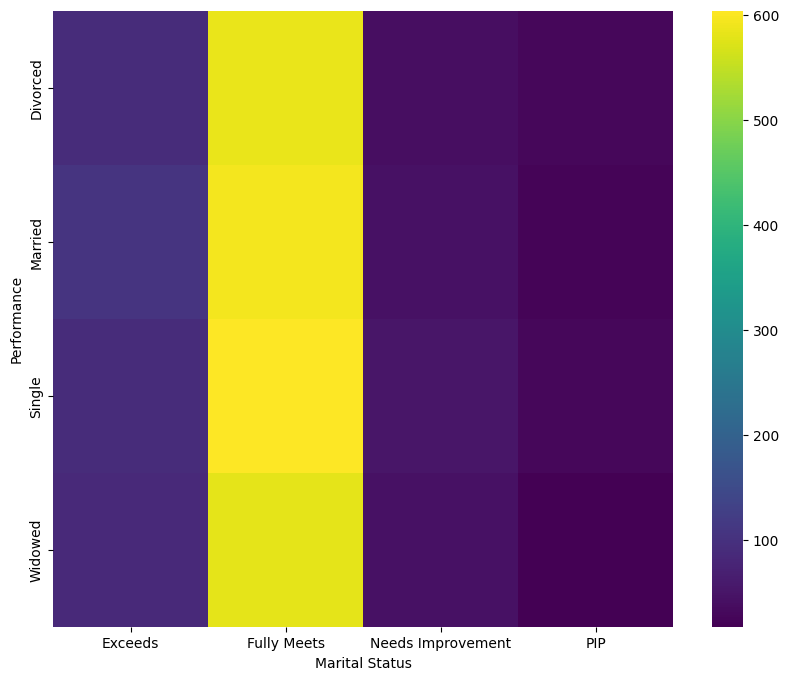

In [36]:
plt.subplots(figsize=(10, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MaritalDesc'].value_counts()
    for x_label, grp in dataset.groupby('Performance Score')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Marital Status')
_ = plt.ylabel('Performance')

Marital status has no visible influence on performance.

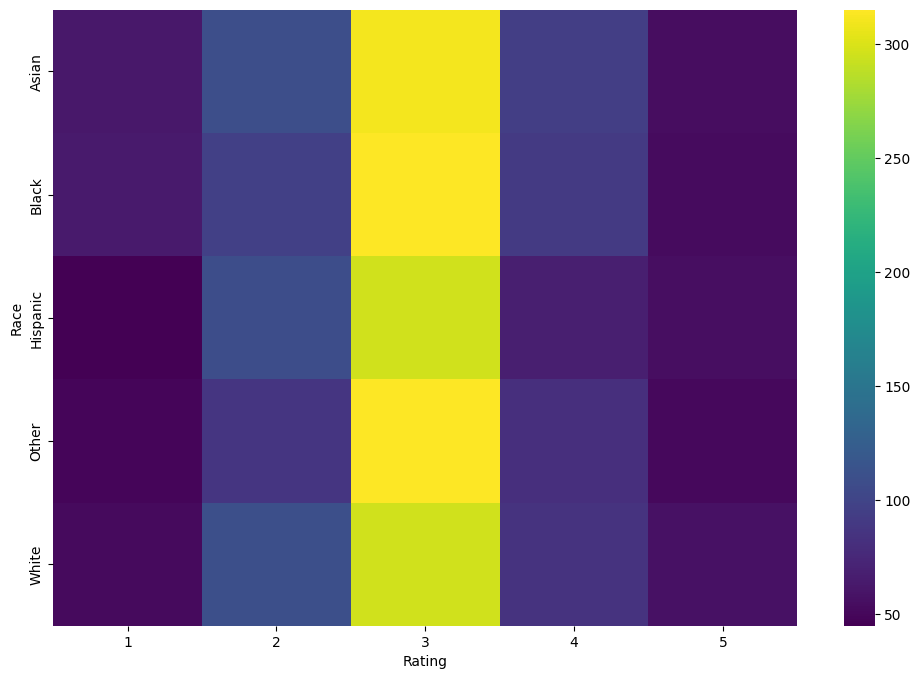

In [37]:
plt.subplots(figsize=(12, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['RaceDesc'].value_counts()
    for x_label, grp in dataset.groupby('Current Employee Rating')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Rating')
_ = plt.ylabel('Race')

## Splitting the data into features and targets

Selecting only important fields.

In [38]:
dataset = dataset[['Title', 'BusinessUnit', 'EmployeeType', 'DepartmentType', 'Division', 'State', 'GenderCode', 'RaceDesc', 'MaritalDesc', 'Current Age', 'Current Employee Rating']]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Title                    3000 non-null   object
 1   BusinessUnit             3000 non-null   object
 2   EmployeeType             3000 non-null   object
 3   DepartmentType           3000 non-null   object
 4   Division                 3000 non-null   object
 5   State                    3000 non-null   object
 6   GenderCode               3000 non-null   object
 7   RaceDesc                 3000 non-null   object
 8   MaritalDesc              3000 non-null   object
 9   Current Age              3000 non-null   int64 
 10  Current Employee Rating  3000 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 257.9+ KB


Splitting the dataset into examples (X) and targets (y, performance scores).

In [40]:
np_dataset = dataset.to_numpy()
X, y = np_dataset[:, :10], np_dataset[:, 10]
print(f'examples: {len(X)} \t features: {len(X[0])}')

examples: 3000 	 features: 10


In [41]:
example = X[0][:9]
example

array(['Production Technician I', 'CCDR', 'Contract', 'Production       ',
       'Finance & Accounting', 'MA', 'Female', 'White', 'Widowed'],
      dtype=object)

In [42]:
y

array([4, 3, 4, ..., 2, 2, 2], dtype=object)

## Expiriment 1: One hot encoding


### Encoding the features

Using one-hot encoding for X.

In [43]:
enc = OneHotEncoder()
# excluding Age as it doesn't need to be encoded
enc.fit(X[:, :9])

OneHotEncoder()

In [44]:
example_encoded = enc.transform([example]).toarray()[0]
example_encoded

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])

In [45]:
len(example_encoded)

115

In [46]:
X_encoded = np.concatenate((enc.transform(X[:, :9]).toarray(), X[:, 9:]), axis=1)
X_encoded

array([[0.0, 0.0, 0.0, ..., 0.0, 1.0, 55],
       [0.0, 0.0, 0.0, ..., 0.0, 1.0, 59],
       [0.0, 0.0, 1.0, ..., 0.0, 1.0, 33],
       ...,
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 28],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 71],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 34]], dtype=object)

Using label encoding for targets.

In [47]:
le = LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)
y_encoded

array([3, 2, 3, ..., 1, 1, 1])

Splitting the data into train and test sets.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.1, random_state=111)

### Random Forest

In [49]:
def evaluate(preds, labels):
    return sum(preds == labels) / len(preds)

Doing cross-validation with 5 folds.

In [50]:
model = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=111)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
scores

array([0.52777778, 0.53333333, 0.51666667, 0.52222222, 0.53703704])

In [51]:
print(f'{round(scores.mean(), 3)} accuracy with a standard deviation of {round(scores.std(), 3)}')

0.527 accuracy with a standard deviation of 0.007


Evaluating on the test set.

In [52]:
model = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=111)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(evaluate(preds, y_test))

0.55


### XGBoost

Doing cross-validation with 5 folds.

In [53]:
xgb = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 3, seed = 111)
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores

array([-1.11468971, -0.97841346, -1.06760597, -0.96774054, -1.0685339 ])

In [54]:
print(f'{round(-scores.mean(), 3)} MSE with a standard deviation of {round(scores.std(), 3)}')

1.039 MSE with a standard deviation of 0.057


Evaluating on the test set.

In [55]:
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
mse = MSE(y_test, preds)
print(mse)

1.0507805347442627


In [56]:
# calculating a baseline MSE
mse = MSE(y_test, [np.mean(y_train)] * len(y_test))
print(mse)

1.031935939643347


The baseline and our MSE on test score are pretty similar.. While the second one should be much higher. The model is not learning meaningful patterns from the data...

## Experiment 2: Label Encoding

### Encoding the features

Using ordinal (label) encoding for X.

In [57]:
enc = OrdinalEncoder()
enc.fit(X[:, :9])
example_encoded = enc.transform([example])[0]
example_encoded

array([22.,  1.,  0.,  3.,  8., 10.,  0.,  4.,  3.])

In [58]:
len(example_encoded)

9

In [59]:
X_encoded = np.concatenate((enc.transform(X[:, :9]), X[:, 9:]), axis=1)
X_encoded

array([[22.0, 1.0, 0.0, ..., 4.0, 3.0, 55],
       [22.0, 2.0, 0.0, ..., 2.0, 3.0, 59],
       [2.0, 5.0, 1.0, ..., 2.0, 3.0, 33],
       ...,
       [22.0, 8.0, 0.0, ..., 4.0, 2.0, 28],
       [22.0, 9.0, 0.0, ..., 2.0, 0.0, 71],
       [22.0, 0.0, 1.0, ..., 4.0, 1.0, 34]], dtype=object)

Using label encoding for targets.

In [60]:
le = LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)
y_encoded

array([3, 2, 3, ..., 1, 1, 1])

Splitting the data into train and test sets.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.1, random_state=111)

### Random Forest

Doing cross-validation with 5 folds.

In [62]:
model = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=111)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
scores

array([0.53888889, 0.54074074, 0.53148148, 0.52222222, 0.53518519])

In [63]:
print(f'{round(scores.mean(), 3)} accuracy with a standard deviation of {round(scores.std(), 3)}')

0.534 accuracy with a standard deviation of 0.007


Evaluating on the test set.

In [65]:
model = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=111)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(evaluate(preds, y_test))

0.5533333333333333


Let's get feature importances (the built-in feature of RandomForestClassifier).

In [66]:
importances = model.feature_importances_
importances

array([0.33971552, 0.040767  , 0.01437674, 0.22565686, 0.05773031,
       0.12818703, 0.07417973, 0.02847325, 0.02026684, 0.07064672])

In [67]:
features = list(dataset.columns.values)
features.remove('Current Employee Rating')
features

['Title',
 'BusinessUnit',
 'EmployeeType',
 'DepartmentType',
 'Division',
 'State',
 'GenderCode',
 'RaceDesc',
 'MaritalDesc',
 'Current Age']

In [68]:
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
0,Title,0.339716
3,DepartmentType,0.225657
5,State,0.128187
6,GenderCode,0.074180
9,Current Age,0.070647
4,Division,0.057730
1,BusinessUnit,0.040767
7,RaceDesc,0.028473
8,MaritalDesc,0.020267
2,EmployeeType,0.014377


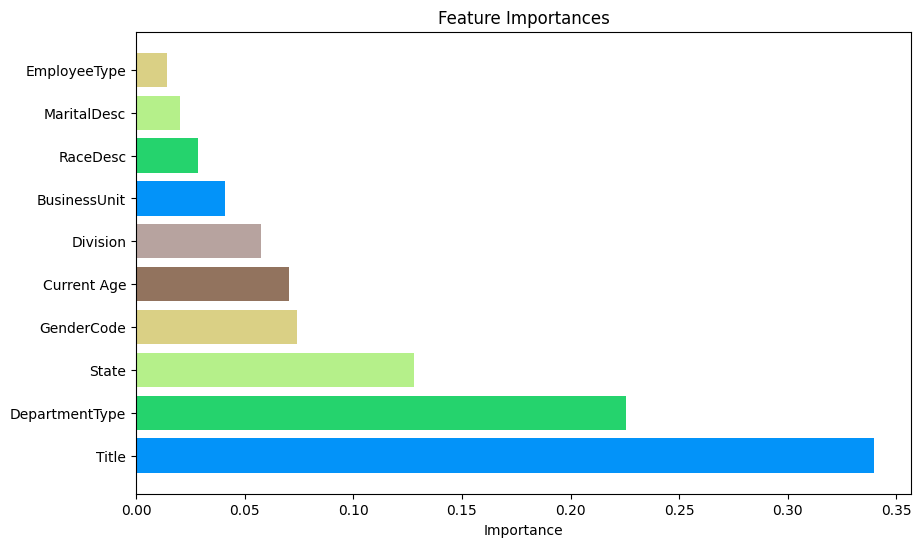

In [69]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=sns.palettes.mpl_palette('terrain'))
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

### XGBoost

Doing cross-validation with 5 folds.

In [70]:
xgb = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 3, seed = 111)
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores

array([-1.13508594, -0.99085242, -1.09236288, -0.96950525, -1.10114336])

In [71]:
print(f'{round(-scores.mean(), 3)} MSE with a standard deviation of {round(scores.std(), 3)}')

1.058 MSE with a standard deviation of 0.065


In [72]:
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
mse = MSE(y_test, preds)
print(mse)

1.052526593208313


In [73]:
mse = MSE(y_test, [np.mean(y_train)] * len(y_test))
print(mse)

1.031935939643347


## Experiment 3: Target Encoding

### Encoding the features

Using label encoding for targets.

In [74]:
le = LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)
y_encoded

array([3, 2, 3, ..., 1, 1, 1])

Using target encoding for X.

In [75]:
enc = TargetEncoder(smooth='auto')
enc.fit(X[:, :9], y_encoded)
example_encoded = enc.transform([example])[0]
example_encoded

array([0.07949255, 0.15443936, 0.55560556, 0.12794162, 0.08251848,
       0.10660378, 0.18992755, 0.47013247, 0.14996358, 0.083354  ,
       0.0873045 , 0.15774954, 0.52181369, 0.14087181, 0.09225961,
       0.0886147 , 0.16930727, 0.50891143, 0.13762476, 0.09554166,
       0.07164407, 0.14318952, 0.54239754, 0.19887375, 0.04319206,
       0.08449849, 0.15390979, 0.5484579 , 0.12712621, 0.08600673,
       0.07907846, 0.14745546, 0.56655436, 0.12307664, 0.08383221,
       0.08681702, 0.18361525, 0.49251667, 0.14189939, 0.09514956,
       0.07885221, 0.1590738 , 0.53523497, 0.14660135, 0.08023347])

In [76]:
len(example_encoded)

45

In [77]:
X_encoded = np.concatenate((enc.transform(X[:, :9]), X[:, 9:]), axis=1)
X_encoded

array([[0.0794925455539641, 0.1544393645078774, 0.5556055572724579, ...,
        0.14660135443704672, 0.08023347015368548, 55],
       [0.0794925455539641, 0.1544393645078774, 0.5556055572724579, ...,
        0.14660135443704672, 0.08023347015368548, 59],
       [0.1578804819474563, 0.31240046329080007, 0.12851961018804597,
        ..., 0.14660135443704672, 0.08023347015368548, 33],
       ...,
       [0.0794925455539641, 0.1544393645078774, 0.5556055572724579, ...,
        0.14377692857342417, 0.10360695262050969, 28],
       [0.0794925455539641, 0.1544393645078774, 0.5556055572724579, ...,
        0.12956744687429522, 0.09176545662814899, 71],
       [0.0794925455539641, 0.1544393645078774, 0.5556055572724579, ...,
        0.13874465562736546, 0.0837772665074234, 34]], dtype=object)

Splitting data into train and test sets.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.1, random_state=111)

### Random Forest

Doing cross-validation with 5 folds

In [79]:
model = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=111)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
scores

array([0.54814815, 0.52777778, 0.53148148, 0.54259259, 0.56111111])

In [80]:
print(f'{round(scores.mean(), 3)} accuracy with a standard deviation of {round(scores.std(), 3)}')

0.542 accuracy with a standard deviation of 0.012


Evaluating on the test set.

In [81]:
model = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=111)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(evaluate(preds, y_test))

0.5733333333333334


### XGBoost

Doing cross-validation with 5 folds

In [82]:
xgb = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 3, seed = 111)
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores

array([-1.10780466, -0.96511024, -1.11411738, -0.98364913, -1.0775013 ])

In [83]:
print(f'{round(-scores.mean(), 3)} MSE with a standard deviation of {round(scores.std(), 3)}')

1.05 MSE with a standard deviation of 0.063


Evaluating on the test set.

In [84]:
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
mse = MSE(y_test, preds)
print(mse)

1.0541943311691284


In [85]:
mse = MSE(y_test, [np.mean(y_train)] * len(y_test))
print(mse)

1.031935939643347


## Results

Let's look at our (preprocessed) dataset once again.

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Title                    3000 non-null   object
 1   BusinessUnit             3000 non-null   object
 2   EmployeeType             3000 non-null   object
 3   DepartmentType           3000 non-null   object
 4   Division                 3000 non-null   object
 5   State                    3000 non-null   object
 6   GenderCode               3000 non-null   object
 7   RaceDesc                 3000 non-null   object
 8   MaritalDesc              3000 non-null   object
 9   Current Age              3000 non-null   int64 
 10  Current Employee Rating  3000 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 257.9+ KB


We want to predict Current Employee Rating based on other features. Among these features, only Current Age is numerical, others are categorical. Employee Rating is an integer score from 1 to 5, therefore it is also a categorical feature.

Now, let's take a random employee and try to classify their rating with the classifier from Experiment 3.

In [87]:
employee_id = 111

In [88]:
example = X[employee_id]
example

array(['Area Sales Manager', 'PL', 'Part-Time', 'Sales', 'Fielders', 'TX',
       'Male', 'Asian', 'Widowed', 65], dtype=object)

First, we need to apply target encoding to the example.

In [89]:
# we don't need to encode the age column that is why we skip it
example_encoded = enc.transform([example[:-1]])[0]
example_encoded = np.concatenate((example_encoded, example[9:]))
example_encoded

array([0.1578804819474563, 0.31240046329080007, 0.12851961018804597,
       0.25193146785200976, 0.14784801881881707, 0.09301411148690786,
       0.1329907770663704, 0.5016887524306557, 0.16601205722975998,
       0.10624966511702462, 0.09119405858266845, 0.1750469964798938,
       0.4979162352072465, 0.1456957594204846, 0.09014659663313565,
       0.15377454160916687, 0.31353716012866356, 0.14556136881157627,
       0.24122385901904803, 0.14476463328450148, 0.16907715105025495,
       0.230772275167385, 0.30697771739901547, 0.1702916475151453,
       0.12144977307079573, 0.09603782309285575, 0.21061519303773937,
       0.519056788279472, 0.11577490562860067, 0.05809951974463206,
       0.10469166947690174, 0.19876140731636704, 0.4378384466620299,
       0.16083173369687806, 0.09786913226975878, 0.09855502376602063,
       0.1732856344045505, 0.4928730211836592, 0.14942714619130068,
       0.08585686825740167, 0.07885220849498442, 0.1590738005339525,
       0.5352349661831606, 0.146601

In [90]:
print(f'The encoded example has {len(example_encoded)} features. The original example had {len(example)} features.')

The encoded example has 46 features. The original example had 10 features.


Now, let's apply the Random Forest Classifier, which we trained previously, to the example.

In [91]:
pred = model.predict([example_encoded])[0]
print(pred)

1


Let's decode the label and see to which rating it corresponds.

In [92]:
rating = le.inverse_transform([pred])[0]
print(rating)

2


The predicted rating is 2/5. Let's see the true rating.

In [93]:
true_rating = dataset['Current Employee Rating'][employee_id]
print(true_rating)

2


We can discuss the results. We used three different types of encoding: one-hot encoding, label (ordinal) encoding and target encoding.

*   **One-hot encoding** demonstrated the worst results: the RF classifier returned **55% test-set accuracy**. As the dataset almost entirely consists of categorical values, the one-hot-encoded values were too sparse (too many zeros). Besides, one-hot encoding produced **145 features**. The model is prone to the **curse of dimentionality**.
*   **Label encoding** solves the problem with sparcity: it just assigns an integer value to every categorical variable. But the results improved insignificantly: the RF classifier returned **55.3% test-set accuracy**. Label encoding produced only **9 features**.
*  **Target encoding** ensures that numbers are not randomly assigned to categorical variables but depend on the targets. This gave a significant improvement: the RF classifier returned **57.3% test-set accuracy**. Target encoding produced only **45 features**, which is a good trade-off.

Label encoder also allowed us to get interpretable results from the Random Forest Classifier, because the number of encoded features corresponded to the number of features. The resulting plot of feature importance can be seen below.
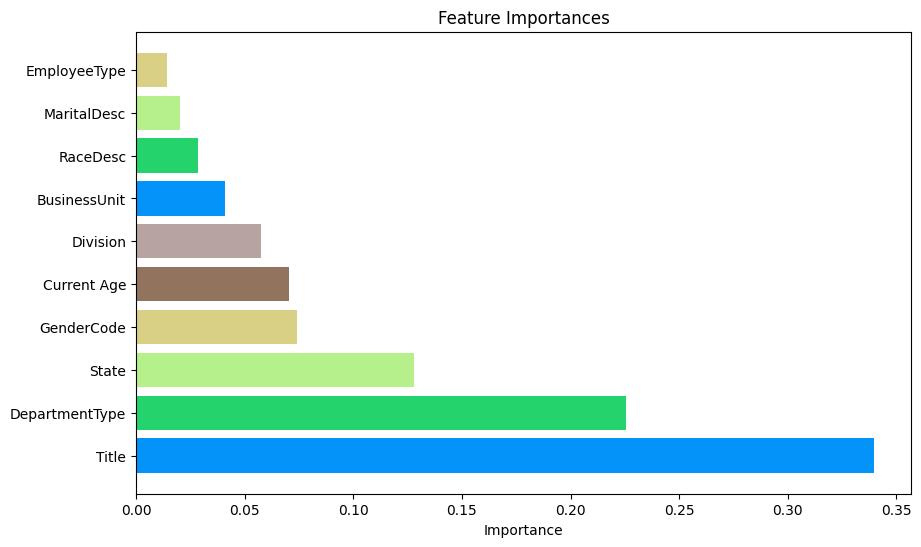

So, Title, Department Type and State (where the employee is located) influence model's decision the most. These are, thus, the most important factors of good or bad employee rating.


To sum up, the best result we got was 57.3% accuracy. We consider this score adequate since employee's rating depends on many additional factors, not included into the dataset. Age, gender, race, etc. do not influence ratings much. The position that an employee takes is an important factor, but obviously rating cannot be predicted by the title and department alone. We consider ourselves to do a good job given the complexity of the task.

<ipython-input-94-8486caf8f399>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Encoding', y='Accuracy', palette='terrain')


(53.0, 58.0)

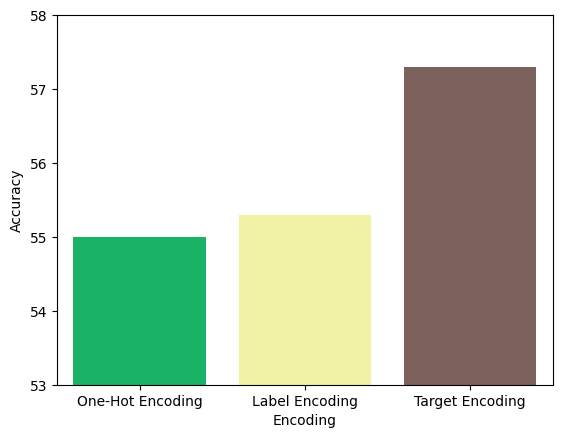

In [94]:
df = pd.DataFrame({'Encoding': ['One-Hot Encoding', 'Label Encoding', 'Target Encoding'], 'Accuracy': [55, 55.3, 57.3]})
ax = sns.barplot(data=df, x='Encoding', y='Accuracy', palette='terrain')
ax.set_ylim(53, 58)